### Step 3: Model Development


#### Binomal Option Pricing Model

In [1]:
suppressMessages(library('xlsx'))
suppressMessages(library('dplyr'))
suppressMessages(library('derivmkts'))
suppressMessages(library('ggplot2'))

suppressMessages(library('repr'))
suppressMessages(library('gifski'))
suppressMessages(library('cowplot'))
suppressMessages(library('ggplotify'))

setwd('/home/jupyter-riley/FE-620/R')

Warning message:
“package ‘gifski’ was built under R version 3.6.3”Warning message:
“package ‘cowplot’ was built under R version 3.6.3”Warning message:
“package ‘ggplotify’ was built under R version 3.6.3”

In [2]:
letters = letters
letters[2]

# This is good, but let's make it bettter

[1] "b"

In [3]:
make_letters = function(){
  new_letters = NULL
  count  = 0
  for (i in 1:26) {
    for(j in 1:26){
      for(k in 1:26){
        count = count + 1
        new_letters[count] = paste(c(letters[i],letters[j], letters[k]),collapse = '')
    }
   }
  }
  return(new_letters)
}
new_letters = make_letters()
new_letters[1]

[1] "aaa"

In [4]:
options(repr.plot.width = 5.4, repr.plot.height =5)

---

### Begin Model Development

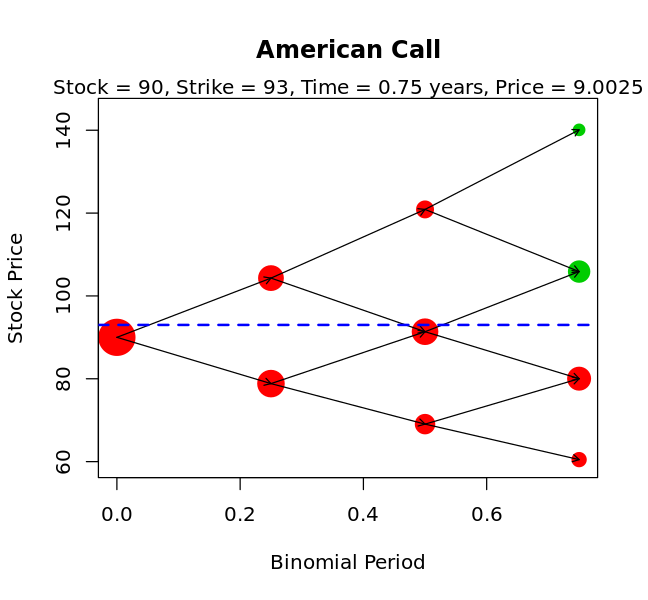

In [5]:
par(mfrow =c(1,1))

s = 90       # Stock Price at Time = 0
k = 93       # Strike Price
v = .28      # Volatility
r = .03      # risk-free rate
t = (9/12)   # time to maturity (in years)
d = 0        # dividend yeild
nsteps = 3   # number of time steps

derivmkts::binomplot(s, k , v , r , t , d , nsteps, 
                     putopt=FALSE, american=TRUE,
                     plotarrows = TRUE, drawstrike = FALSE)

abline(h=k, col="blue", lty = 2, lwd = 2)


In [ ]:
# Save as .png
png("Plots/Binomal_Tree/binomal_tree.png", width = 650, height = 600, res = 110)

derivmkts::binomplot(s, k , v , r , t , d , nsteps, 
                     putopt=FALSE, american=TRUE,
                     plotarrows = TRUE, drawstrike = FALSE)

abline(h=k, col="blue", lty = 2, lwd = 2)


dev.off()

In [7]:

# Create a pdf
#derivmkts::binomplot(s, k , v , r , t , d , nsteps, putopt=FALSE, american=TRUE,
#                   plotarrows = TRUE, drawstrike = FALSE,
#                   saveplot = TRUE, saveplotfn='Plots/Binomal_Tree/binomialplot.pdf')

# export the Results
df = derivmkts::binomopt(s, k , v , r , t , d , nsteps,
                    putopt=FALSE, american=TRUE,
                    returntrees=TRUE)

as.numeric(df$greeks[1])

[1] 0.5340096

In [8]:
# create gif. 
setwd('/home/jupyter-riley/FE-620/R')
print("PLOTS CREATED")

for(nsteps in 1:10){
    # Save as .png
    file_name = paste(c("Plots/Binomal_Tree/gif/bin_plot_", letters[nsteps], '.png'), collapse = '')
    print(file_name)
    png(file_name, width = 650, height = 600, res = 110)

    derivmkts::binomplot(s, k , v , r , t , d , nsteps, 
                         putopt=FALSE, american=TRUE,
                         plotarrows = TRUE, drawstrike = FALSE)

    abline(h=k, col="blue", lty = 2, lwd = 2)
    dev.off()
}

print("-------------------------------------------")
print("PROGRAM COMPELTE")

[1] "PLOTS CREATED"
[1] "Plots/Binomal_Tree/gif/bin_plot_a.png"
[1] "Plots/Binomal_Tree/gif/bin_plot_b.png"
[1] "Plots/Binomal_Tree/gif/bin_plot_c.png"
[1] "Plots/Binomal_Tree/gif/bin_plot_d.png"
[1] "Plots/Binomal_Tree/gif/bin_plot_e.png"
[1] "Plots/Binomal_Tree/gif/bin_plot_f.png"
[1] "Plots/Binomal_Tree/gif/bin_plot_g.png"
[1] "Plots/Binomal_Tree/gif/bin_plot_h.png"
[1] "Plots/Binomal_Tree/gif/bin_plot_i.png"
[1] "Plots/Binomal_Tree/gif/bin_plot_j.png"
[1] "-------------------------------------------"
[1] "PROGRAM COMPELTE"


In [9]:
setwd('Plots/Binomal_Tree/gif')

In [10]:
getwd()

[1] "/home/jupyter-riley/FE-620/R/Plots/Binomal_Tree/gif"

In [11]:
# Generate .gif
png_files <- list.files( full.names = TRUE)
png_files = sort(png_files, decreasing=FALSE)
png_files[1]
png_files[2]

[1] "./bin_plot_a.png"

[1] "./bin_plot_b.png"

In [12]:
gifski::gifski(png_files, gif_file = "animated.gif", width = 800, 
               height = 600, delay = .5, loop = FALSE, progress = TRUE)

Frame 10 (100%)
Finalizing encoding... done!


[1] "animated.gif"

---
## Let's make it better!



In [13]:
s = 90       # Stock Price at Time = 0
k = 93       # Strike Price
v = .28      # Volatility
r = .03      # risk-free rate
t = (9/12)   # time to maturity (in years)
d = 0        # dividend yeild
nsteps = 250   # number of time steps


# "True Price"
df = derivmkts::binomopt(s, k , v , r , t , d , nsteps,
                    putopt=FALSE, american=TRUE,
                    returntrees=TRUE)

true_c = as.numeric(df$price[1])
print(true_c)


[1] 8.279217


### What are the computation efforts for binomal tree? 



In [14]:
X = NULL
Y = NULL
par(mfrow =c(1,1))
setwd('/home/jupyter-riley/FE-620/R')

# Generate the plot! 
options(repr.plot.width = 5, repr.plot.height =5)

count = 0

for(i in 2:nsteps){
    count = count + 1
    df = derivmkts::binomopt(s, k , v , r , t , d , i,
                        putopt=FALSE, american=TRUE,
                        returntrees=TRUE)

    c = as.numeric(df$price[1])
    X[count] = count
    Y[count] = c
    #X = c(1,2,3,4,5)
    #Y = c(10,7,9,8.2,8.3)

    df = data.frame(X,Y)
    if(i==nsteps){
        #you made it to the end! Congrats!
        print("LAST PLOT")
        Z = rep(true_c,length(X))
        df = data.frame(df,Z)
        
        file_name = paste(c("Plots/Binomal_Tree/line_graph/line_plot_", 
                        new_letters[count],
                        ".png"), collapse= '')
        x = paste(c(count, "  ", file_name), collapse = '')
        print(x)
        png(file_name, width = 600, height = 600, res = 110)

        plot_1 = ggplot(df) +
          geom_line(aes(x = X, y = Y)) +
          #geom_line(aes(x = X, y = Z), size =.75, color = 'blue', linetype="solid") +
          xlim(0, nsteps) +
          labs(
            title = " ",
            y = "Call Option Price",
            x = "Number of Time Steps")+
          theme_linedraw()

        print(plot_1)
        dev.off()    
    }
    else{
        file_name = paste(c("Plots/Binomal_Tree/line_graph/line_plot_", 
                            new_letters[count],
                            ".png"), collapse= '')
        x = paste(c(count, "  ", file_name), collapse = '')
        print(x)
        png(file_name, width = 600, height = 600, res = 110)

        plot_1 = ggplot(df) +
          geom_line(aes(x = X, y = Y)) +
          #geom_line(aes(x = seq(1,nsteps,1),  y = rep(true_c,nsteps)))  +
          xlim(0, nsteps) +
          labs(
            title = " ",
            y = "Call Option Price",
            x = "Number of Time Steps")+
          theme_linedraw()

        print(plot_1)
        dev.off()
    }
}

[1] "1  Plots/Binomal_Tree/line_graph/line_plot_aaa.png"


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


[1] "2  Plots/Binomal_Tree/line_graph/line_plot_aab.png"
[1] "3  Plots/Binomal_Tree/line_graph/line_plot_aac.png"
[1] "4  Plots/Binomal_Tree/line_graph/line_plot_aad.png"
[1] "5  Plots/Binomal_Tree/line_graph/line_plot_aae.png"
[1] "6  Plots/Binomal_Tree/line_graph/line_plot_aaf.png"
[1] "7  Plots/Binomal_Tree/line_graph/line_plot_aag.png"
[1] "8  Plots/Binomal_Tree/line_graph/line_plot_aah.png"
[1] "9  Plots/Binomal_Tree/line_graph/line_plot_aai.png"
[1] "10  Plots/Binomal_Tree/line_graph/line_plot_aaj.png"
[1] "11  Plots/Binomal_Tree/line_graph/line_plot_aak.png"
[1] "12  Plots/Binomal_Tree/line_graph/line_plot_aal.png"
[1] "13  Plots/Binomal_Tree/line_graph/line_plot_aam.png"
[1] "14  Plots/Binomal_Tree/line_graph/line_plot_aan.png"
[1] "15  Plots/Binomal_Tree/line_graph/line_plot_aao.png"
[1] "16  Plots/Binomal_Tree/line_graph/line_plot_aap.png"
[1] "17  Plots/Binomal_Tree/line_graph/line_plot_aaq.png"
[1] "18  Plots/Binomal_Tree/line_graph/line_plot_aar.png"
[1] "19  Plots/Binomal

[1] "143  Plots/Binomal_Tree/line_graph/line_plot_afm.png"
[1] "144  Plots/Binomal_Tree/line_graph/line_plot_afn.png"
[1] "145  Plots/Binomal_Tree/line_graph/line_plot_afo.png"
[1] "146  Plots/Binomal_Tree/line_graph/line_plot_afp.png"
[1] "147  Plots/Binomal_Tree/line_graph/line_plot_afq.png"
[1] "148  Plots/Binomal_Tree/line_graph/line_plot_afr.png"
[1] "149  Plots/Binomal_Tree/line_graph/line_plot_afs.png"
[1] "150  Plots/Binomal_Tree/line_graph/line_plot_aft.png"
[1] "151  Plots/Binomal_Tree/line_graph/line_plot_afu.png"
[1] "152  Plots/Binomal_Tree/line_graph/line_plot_afv.png"
[1] "153  Plots/Binomal_Tree/line_graph/line_plot_afw.png"
[1] "154  Plots/Binomal_Tree/line_graph/line_plot_afx.png"
[1] "155  Plots/Binomal_Tree/line_graph/line_plot_afy.png"
[1] "156  Plots/Binomal_Tree/line_graph/line_plot_afz.png"
[1] "157  Plots/Binomal_Tree/line_graph/line_plot_aga.png"
[1] "158  Plots/Binomal_Tree/line_graph/line_plot_agb.png"
[1] "159  Plots/Binomal_Tree/line_graph/line_plot_agc.pn

In [15]:
setwd('/home/jupyter-riley/FE-620/R/Plots/Binomal_Tree/line_graph')
png_files <- list.files( full.names = TRUE)
png_files = sort(png_files, decreasing=FALSE)

print(getwd())

gifski::gifski(png_files, gif_file = "line_graph.gif", width = 800, 
               height = 800, delay = .03, loop = FALSE, progress = TRUE)
setwd('/home/jupyter-riley/FE-620/R')

[1] "/home/jupyter-riley/FE-620/R/Plots/Binomal_Tree/line_graph"
Frame 249 (100%)
Finalizing encoding... done!


[1] "line_graph.gif"